<img src="https://ga-dash.s3.amazonaws.com/production/assets/logo-9f88ae6c9c3871690e33280fcf557f33.png" style="float: left; margin: 15px;">

## Random variables and probability distributions

Week 2 | Lesson 2.05

creator: Kiefer Katovich, SF



## Recap & Random Variables

---

Remember that an **experiment** is an infinitely-repeatable procedure with a well-defined set of outcomes.

Remember that the **sample space** for a given experiment is the set of all possible outcomes of that experiment.

A **random variable** is a function from a sample space $S$ to the real numbers.

#### Examples:

1. I flip five coins. Let $X$ be the number of heads I observe.

2. I toss two dice. Let $Y$ be the sum of the observed values.

3. I apply different amounts of fertilizer to corn plants. Let $Z$ be the yield of corn plants per acre.

(Examples taken from [Statistical Inference](https://fsalamri.files.wordpress.com/2015/02/casella_berger_statistical_inference1.pdf) by Casella and Berger.)

There are two categories of random variables: **discrete random variables** and **continuous random variables**.

### Discrete random variables

Discrete random variables have outcomes which are "countable". The number of heads in a series of coin flips, for example, or the number of aces drawn in a series of hands from a deck of cards. Each discrete outcome has an associated probability of occuring.

For discrete random variables, the distribution of the probabilities of each outcome is called the **probability mass function (pmf)**.

### Continuous random variables

Continuous random variables, on the other hand, have outcomes which are not countable. Say, for example, $T$ is a random variable representing the temperature at noon. There are not exact temperature outcomes with associated probabilities of occurance – the number of outcomes is infinite. The probabilities of _ranges of values_ are calculated as areas under the **probability density function (pdf)**, which is the probability function associated with continuous variables.

**Check:** What is a distribution?

In [1]:
import numpy as np
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import imp

sns.set_style('whitegrid')

%config InlineBackend.figure_format = 'retina'
%matplotlib inline

# Discrete Distributions!

## The discrete uniform distribution

---

The **discrete uniform distribution** is used when we have a **discrete set of outcomes** and **each outcome is equally likely**.

For example, imagine we roll a fair die. The outcome of rolling the die is represented by a random variable $X$, which can take on values 1 through 6.

The probability mass function $f$ over the six possible outcomes $x$, each with an associated probability $p$, is defined as:

$$  f(x|p) =
    \begin{cases}
    0.1\overline{66} & \text{for }x=1 \\ 
    0.1\overline{66} & \text{for }x=2 \\
    0.1\overline{66} & \text{for }x=3 \\
    0.1\overline{66} & \text{for }x=4 \\
    0.1\overline{66} & \text{for }x=5 \\
    0.1\overline{66} & \text{for }x=6
    \end{cases}
$$

This is an example of the **discrete uniform distribution** because all of the outcomes have the same probability. 

If you plot the probability mass function (often abbreviated $pmf$), you can see that the probability histogram is uniform (flat).

In [2]:
def plot_discrete_pmf(low, high, p=None, n=None, dist_name='Discrete', stats_dist=None, lw=20):
    ## low = low end of distribution
    ## high = high end of distribution
    ## p = probability of success
    ## n = number of trials
    ## dist_name = name of distribution (included in title)
    ## stats_dist = statistical distribution
    ## lw = line width
    
    if stats_dist is None:
        discrete = stats.randint(low, high+1)
    else:
        discrete = stats_dist
        
    x = np.arange(low-1., high+1.)
    
    fig, ax = plt.subplots(1, 1, figsize=(10,5))
    
    ax.set_xlim(low-1, high+1)
    ax.set_xlabel('Outcomes', fontsize=16)
    ax.set_ylabel('Probability Mass Function (pmf)', fontsize=16)
    ax.vlines(x, 0, discrete.pmf(x), colors='darkred', lw=lw, alpha=0.6)
    ax.set_ylim(0, np.max(discrete.pmf(x))+0.03)

    if not p is None:
        p_format = ' p='+'{:.4f}'.format(p)
    else:
        p_format = ''
    if not n is None:
        n_format = ' n='+str(n)
    else:
        n_format = ''
    
    title = dist_name+n_format+p_format+'\n'
    plt.title(title, fontsize=20)

    plt.show()

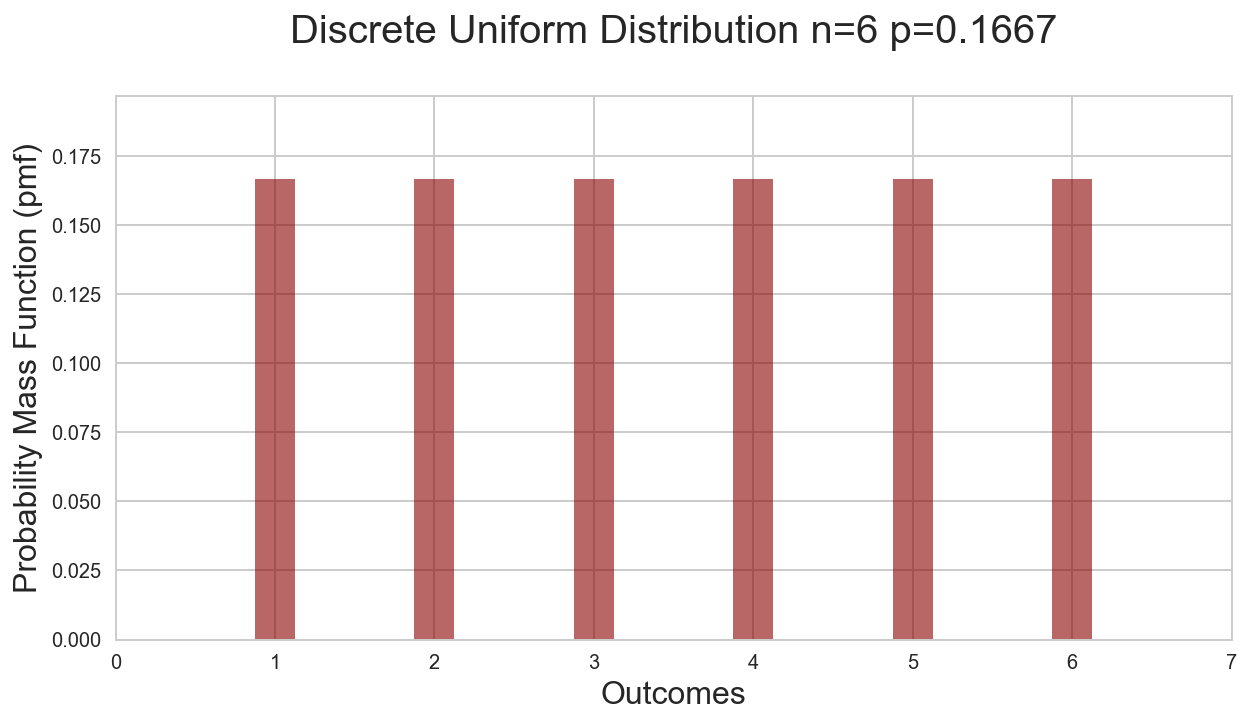

In [3]:
plot_discrete_pmf(1, 6, 1/6., 6, 'Discrete Uniform Distribution')

## The cumulative distribution function (CDF)

---

Continuing with the die example, we can also plot out the **cumulative probability** of our six outcomes. This is known as the **cumulative distribution function** (often abbreviated $cdf$). We can get this by starting at the minimum possible outcome, then add the probability of each outcome. Thus, each point on a cumulative distribution function represents the probability that a random variable is less than or equal to that value.

In a formula, if the $pdf$ is given by $f(x) = P(X = x)$, we write the $cdf$ as $F(x) = P(X \leq x)$.

In [4]:
def plot_discrete_cdf(low, high, p=None, n=None, dist_name='Discrete', stats_dist=None):
    
    if stats_dist is None:
        discrete = stats.randint(low, high+1)
    else:
        discrete = stats_dist
        
    x = np.linspace(low-1, high+1, 300)
    
    fig, ax = plt.subplots(1, 1, figsize=(10,5))

    ax.set_ylim(0, 1.1)
    ax.set_xlim(low-1, high+1)
    ax.set_xlabel('Outcomes', fontsize=16)
    ax.set_ylabel('Cumulative Distribution Function (cdf)', fontsize=16)
    
    ax.plot(x, discrete.cdf(x), lw=4, color='darkblue')
    
    if not p is None:
        p_format = ' p='+'{:.4f}'.format(p)
    else:
        p_format = ''
    if not n is None:
        n_format = ' n='+str(n)
    else:
        n_format = ''

    title = dist_name+n_format+p_format+'\n'
    plt.title(title, fontsize=20)

    plt.show()

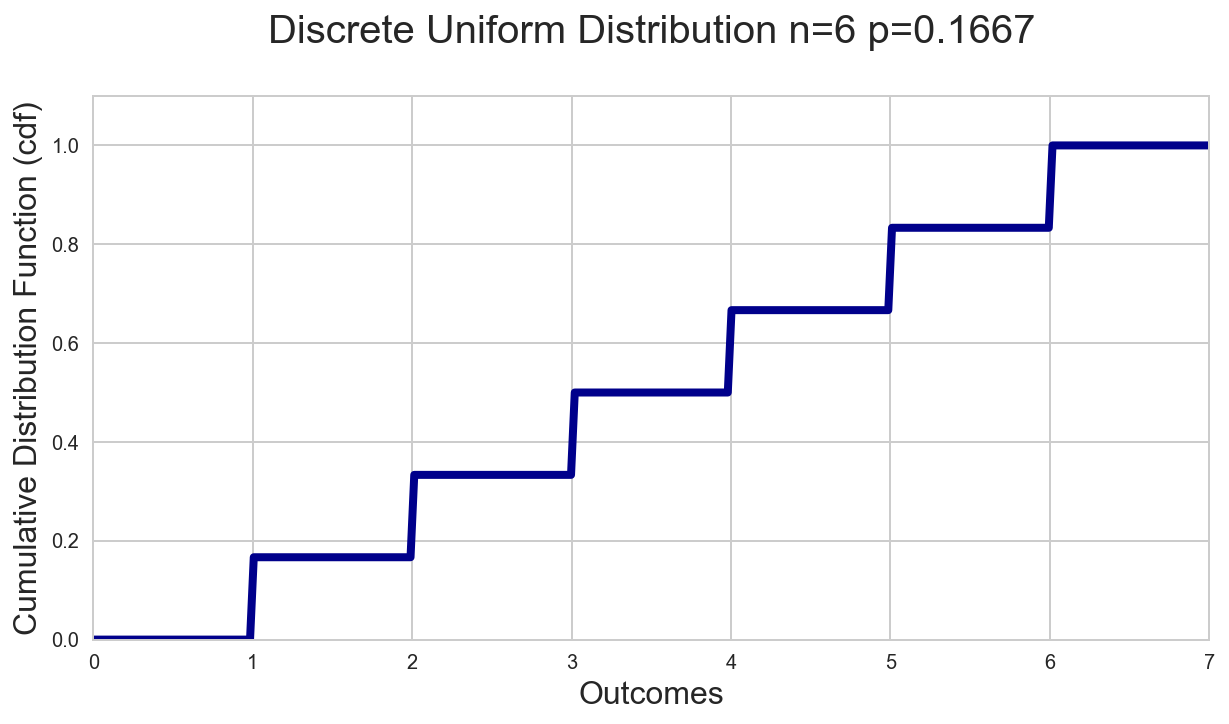

In [5]:
plot_discrete_cdf(1, 6, 1./6, 6, 'Discrete Uniform Distribution')

Perhaps unsurprisingly, the $cdf$ will **always** be 0 everywhere to the left of the minimum outcome and the $cdf$ will **always** be 1 everywhere to the right of the maximum outcome.

We can simultaneously visualize the probability density/mass function and the cumulative distribution function [here](http://students.brown.edu/seeing-theory/).

## The Bernoulli distribution

---

When to use this distribution:

- When your outcome is binary. (We'll often call these two outcomes `success` and `failure` and use `1` to denote success, `0` to denote failure.)
- When there is a constant probability of success $p$.

Parameters of this distribution:

- probability of success $p$

Some common examples of a Bernoulli random variable:

- A coin flip.
- Whether or not it will rain tomorrow.
- Whether a user will buy your product after visiting your website.

That last example, and Bernoulli distributed variables in general, will continually appear throughout the course, especially in the contexts of classification and split testing.

#### Bernoulli pmf

The probability mass function $f$ for outcomes $x$ and probabilities $p$ is:

$$  f(x|p) =
    \begin{cases}
    p & \text{for }x=1 \\
    1-p & \text{for }x=0 \\ 
    \end{cases}
$$

Below is a pdf where $p = 0.25$, an unfair coin-flip.

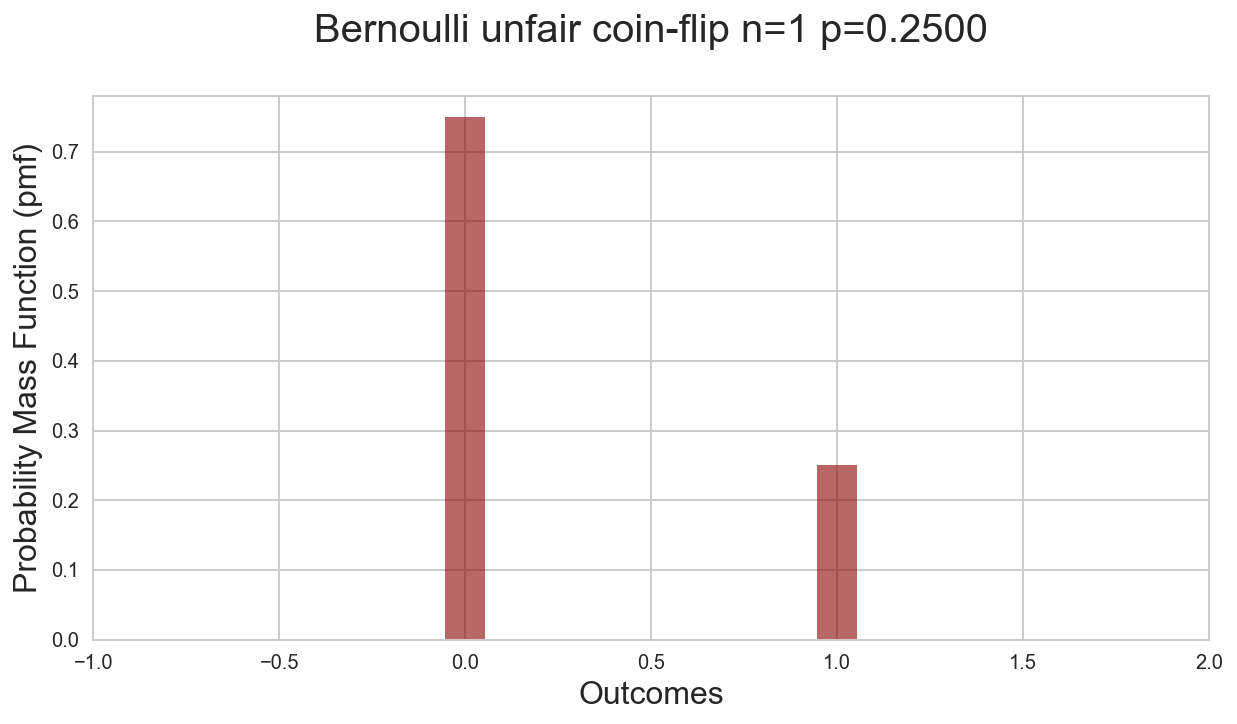

In [6]:
plot_discrete_pmf(0, 1, 0.25, 1, 'Bernoulli unfair coin-flip', stats_dist=stats.bernoulli(0.25))

#### Bernoulli CDF

Its cumulative distribution function is also defined as a function of $x$ outcomes with $p$ probabilities:

$$ F(x|p) =
\begin{cases}
    0 & \text{for }x<0 \\ 1 - p & \text{for }0\leq x<1 \\ 1 & \text{for }x\geq 1
\end{cases} $$

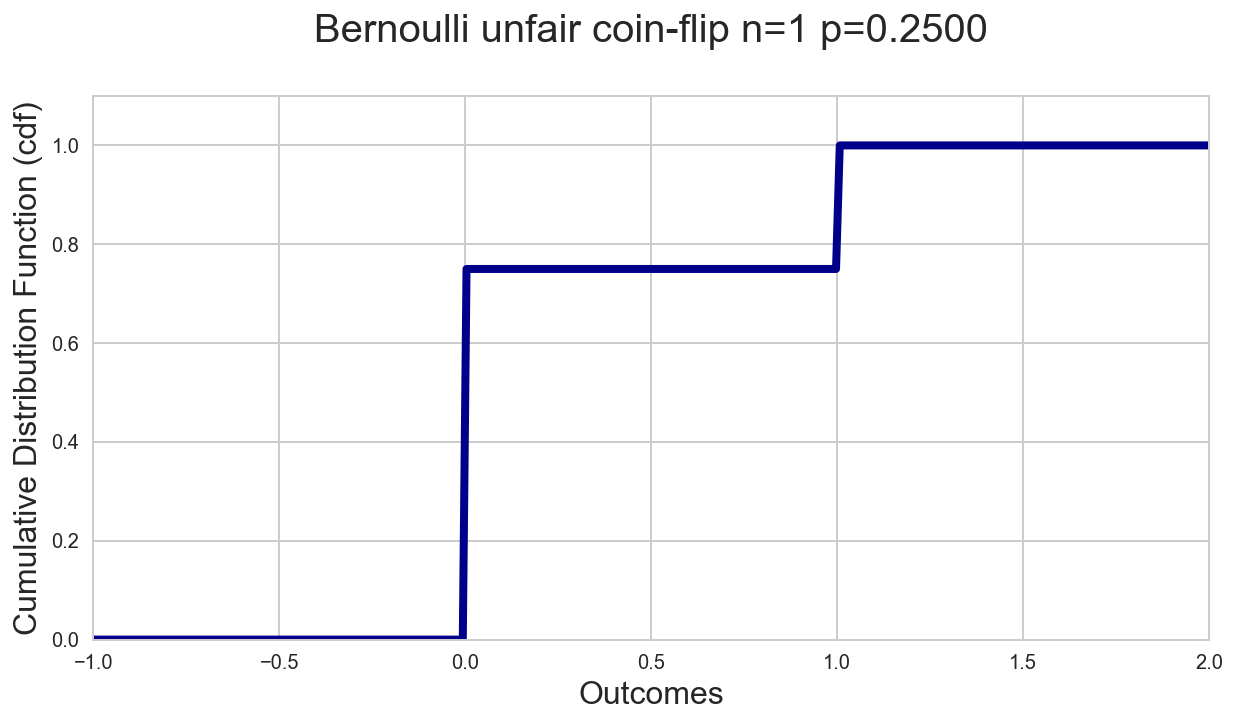

In [7]:
plot_discrete_cdf(0, 1, 0.25, 1, 'Bernoulli unfair coin-flip', stats_dist=stats.bernoulli(0.25))

<a id='bernoulli'></a>

## The Binomial distribution

---

The binomial distribution is directly related to the Bernoulli distribution: it is **the sum of successes of a Bernoulli distributed random variable.**

When it's used:

- when you have fixed $n$ independent Bernoulli trials.

More explicitly:

- when you have fixed $n$ trials,
- each trial is independent of one another,
- when you have a constant probability of success $p$, and
- when you have a binary outcome.

Parameters of the distribution:

- probability of success $p$
- number of trials $n$
 

#### Binomial pmf

The $pmf$ is a function of $n$ trials with $p$ probability of success and $x$ successes in those trials:

$$ f(x|n,p) = P(X = x) = \binom n x  p^x(1-p)^{n-x} $$

Which describes the probability that there will be $x$ successes in $n$ trials.

Below is the binomial pmf for 50 coin flips of a coin with probability of getting heads at 25%.


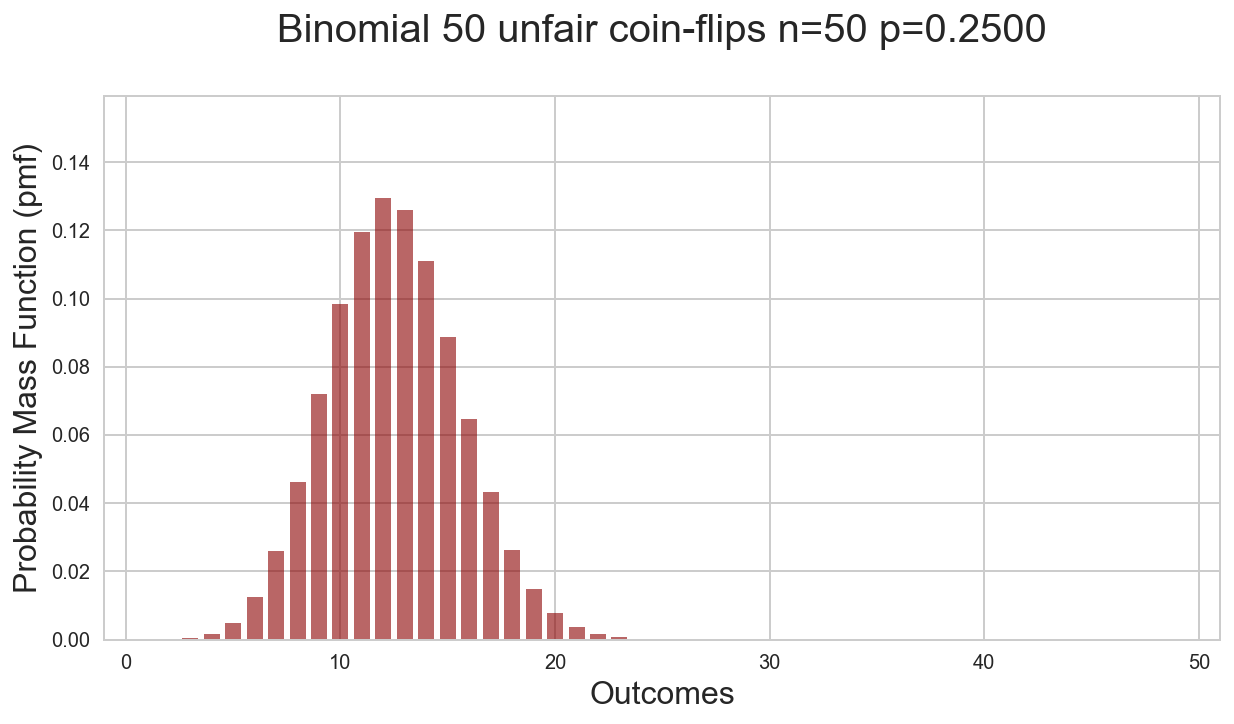

In [13]:
plot_discrete_pmf(0, 50, 0.25, 50, 'Binomial 50 unfair coin-flips', stats.binom(50,0.25), lw=8)

#### Binomial cdf

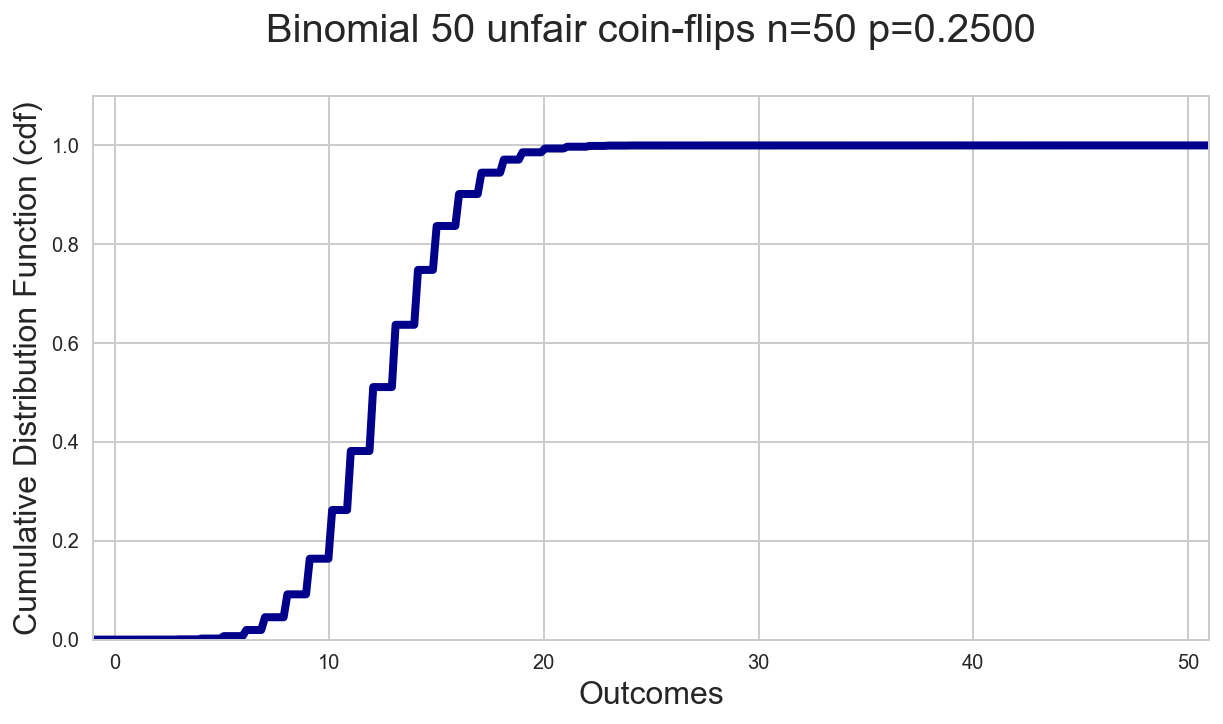

In [14]:
plot_discrete_cdf(0, 50, 0.25, 50, 'Binomial 50 unfair coin-flips', stats.binom(50,0.25))

## The Geometric distribution

---

Whereas the Binomial distribution asks how many successes $x$ occur in $n$ trials, the Geometric distribution asks **how many "failure" trials occur prior to the first "success" trial?**

So, in the canonical coin flip example, how may times do we flip the coin and get tails before we get the first heads (given a probability of heads $p$)?

When we use this:

- each trial is independent of one another,
- when you have a constant probability of success $p$, and
- when you have a binary outcome.

**Note:** We no longer have a fixed number of trials $n$!

Parameters of the distribution:

- probability of success $p$

#### Geometric pmf

The probability mass function is calculated as:

$$ f(x|p) = (1 - p)^{x}\,p $$

Where $k$ is the number of trials and $p$ is the probability of success on each trial.

Let's take the example of drawing cards until we get a king (with replacement!). The probability of getting a king is 4/52. The geometric pdf looks like this:

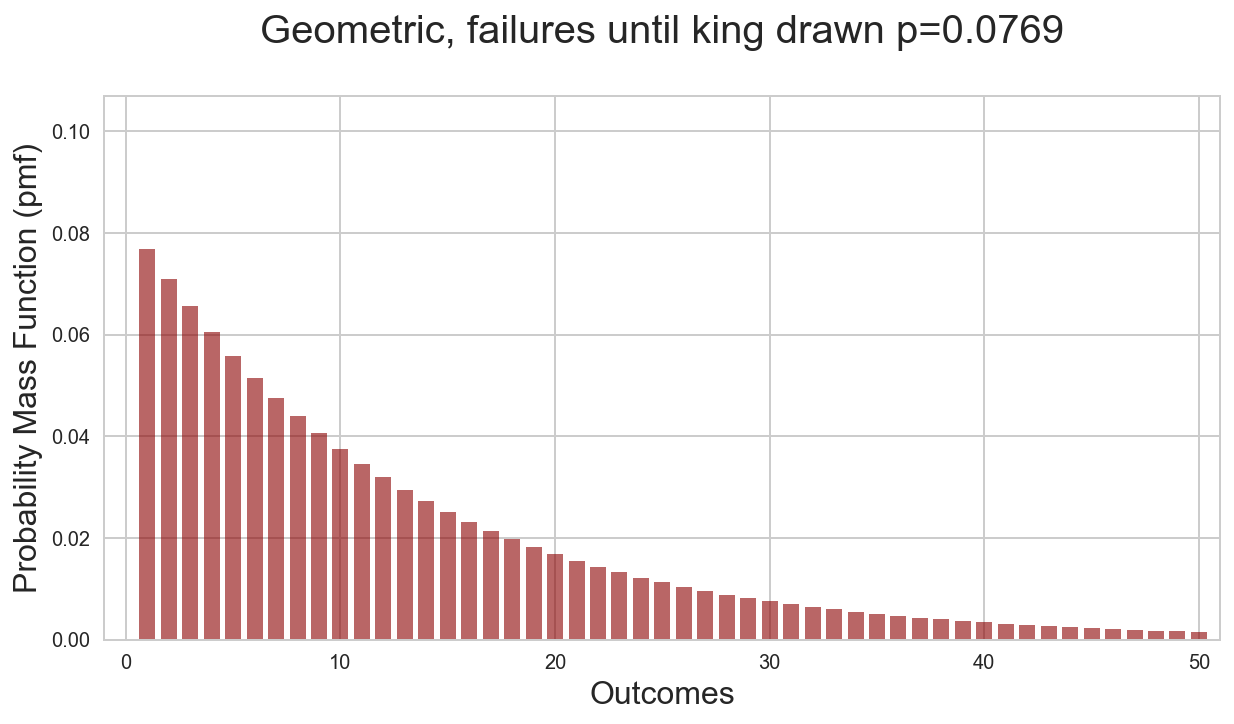

In [15]:
plot_discrete_pmf(0, 50, 4./52., dist_name='Geometric, failures until king drawn', stats_dist=stats.geom(4./52), lw=8)

#### Geometric cdf

Likewise, the cumulative distribution function is:

$$ F(x|p) = 1 - (1 - p)^{x+1} $$

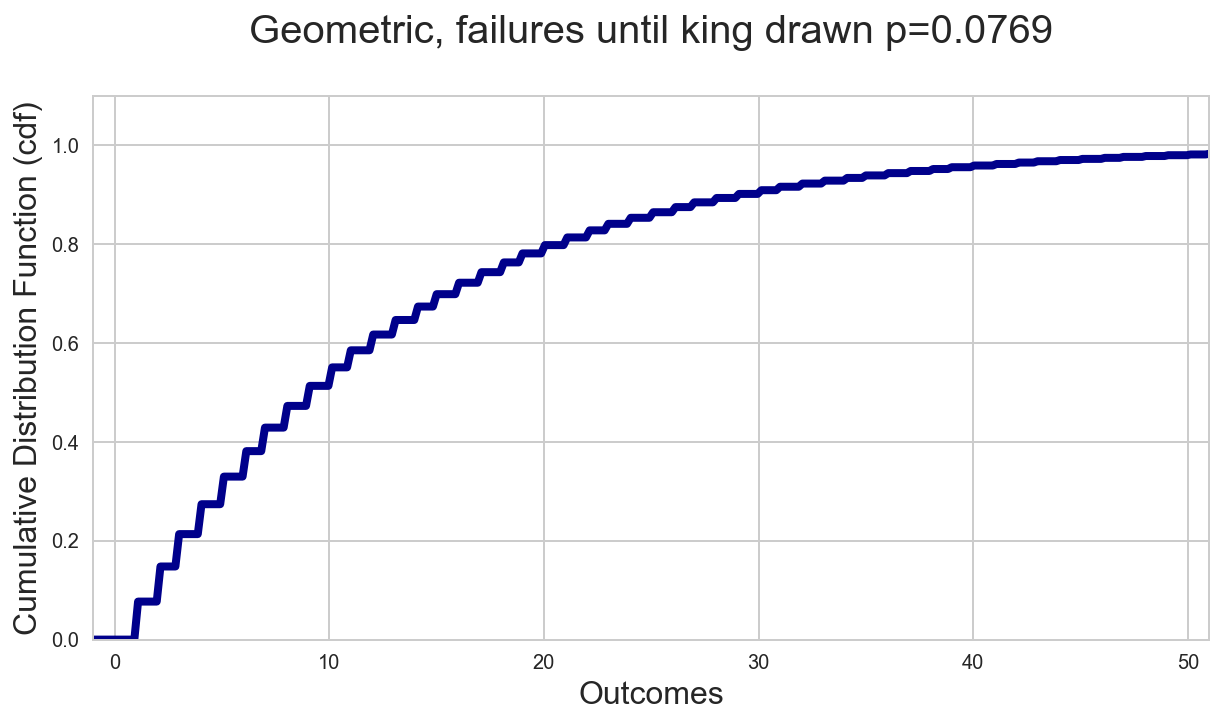

In [16]:
plot_discrete_cdf(0, 50, 4./52., dist_name='Geometric, failures until king drawn', stats_dist=stats.geom(4./52))

<a id='negative_binomial'></a>

## The Negative Binomial distribution

---

The Negative Binomial distribution is a generalization of the Geometric distribution. Where the Geometric distribution represents the number of trials until the first success, **the Negative Binomial represents the number of trials until the first $r$ successes.**

The Geometric is thus a special case of the Negative Binomial, where $r = 1$.

When we use this:

- each trial is independent of one another,
- when you have a constant probability of success $p$,
- when you have a binary outcome,
- when you have a fixed number of successes $r$.

**Note:** We do not have a fixed number of trials $n$!

Parameters of the distribution:

- probability of success $p$
- number of successes $r$

#### Negative Binomial pmf

$$ f(x|r, p) = P(X = x) = \binom{x+r-1}{x} p^x(1-p)^r $$

Where $x$ is the number of failures, $r$ is the number of successes, and $p$ is the probability of success.

For example, say we have a website. We want to measure the number of visitors that will come to the website before 3 of those visitors purchase our product. We know that the probability $p$ of any one visitor purchasing our product is 0.05.

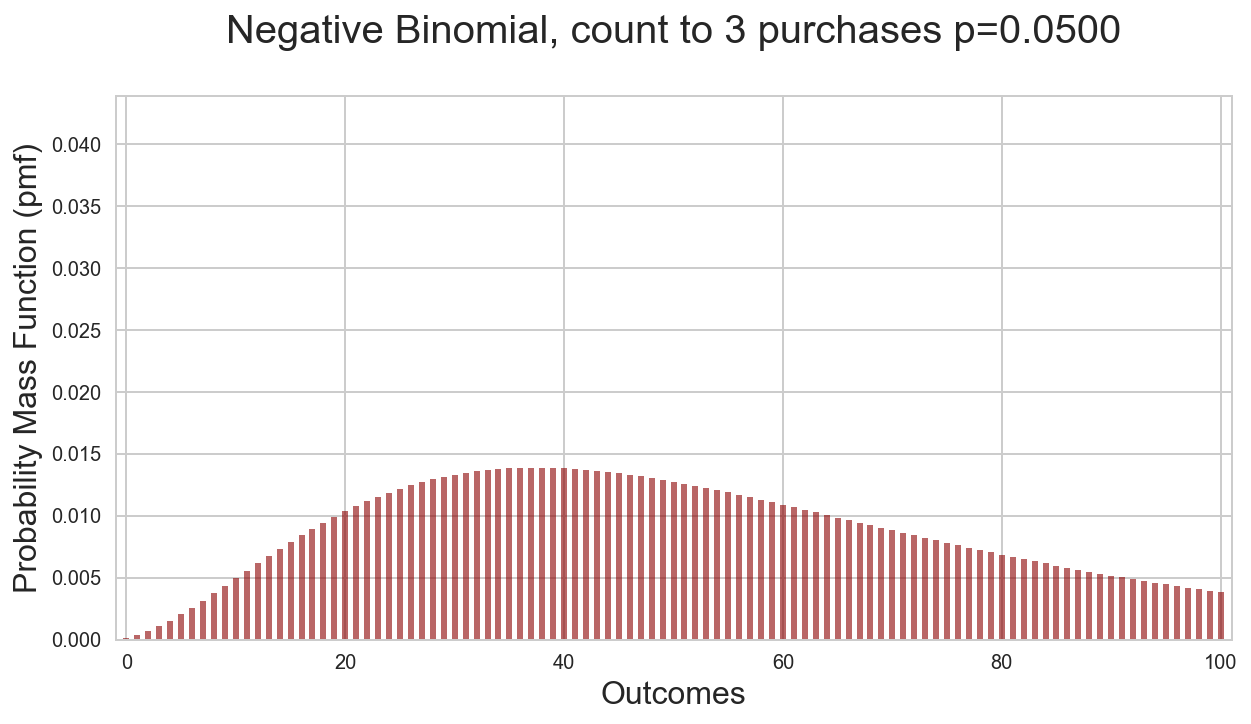

In [17]:
plot_discrete_pmf(0, 100, p=0.05, dist_name='Negative Binomial, count to 3 purchases', 
                  stats_dist=stats.nbinom(3, 0.05), lw=3)

#### Negative Binomial cdf

[The cumulative distribution function is more complex, using a beta function.](https://en.wikipedia.org/wiki/Negative_binomial_distribution) I won't cover it now, but we can still plot the cumulative distribution using the plotting function we wrote.

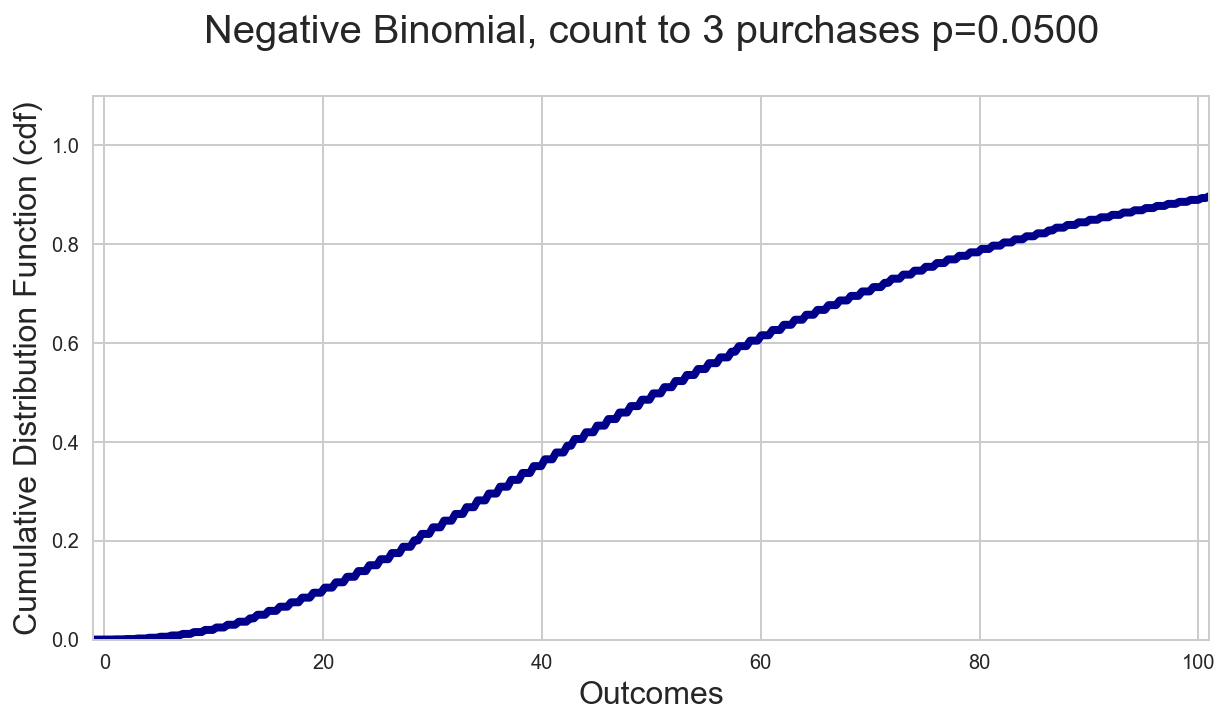

In [18]:
plot_discrete_cdf(0, 100, 0.05, dist_name='Negative Binomial, count to 3 purchases', 
                  stats_dist=stats.nbinom(3, 0.05))

## The Hypergeometric distribution

---

The Hypergeometric distribution is directly related to the Binomial and Bernoulli. Imagine you are selecting cards from a deck of hands. What is the probability that you will draw a heart from the deck of cards each time you draw, **without putting the cards back in**?

The Binomial distribution would model the probability of drawing a heart when you are selecting the cards **with replacement.**

The Hypergeometric, on the other hand, models the probability of drawing a heart **without replacement.** This distribution is appropriate any time events are done without replacement.

When we use this:


Parameters of this distribution:

- $N$ fixed population,
- $n$ fixed trials, and
- $K$ possible successes.

#### Hypergeometric pmf

The Hypergeometric pmf is

$$  P(X = x|K,N,n) = \frac{\binom{K}{x} \binom{N - K}{n-x}}{\binom{N}{n}} $$

Where $N$ is the total size of the "population" (52 cards),

$K$ is the total number of possible "successes" (13 hearts),

$n$ is the number of trials, or draws,

$x$ is the number of successes in those draws

The pmf here displays how many hearts we expect to draw when we pull 20 cards from the deck:

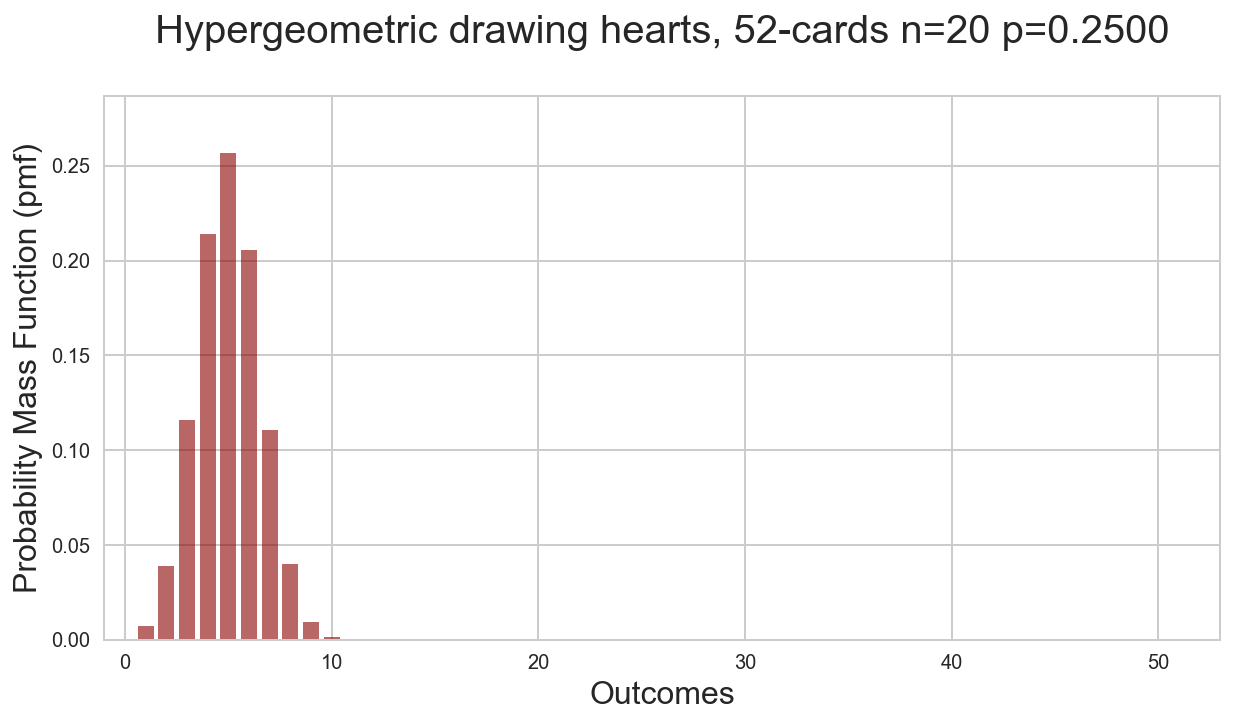

In [19]:
plot_discrete_pmf(0, 52, 0.25, 20, 'Hypergeometric drawing hearts, 52-cards', stats.hypergeom(52,13,20), lw=8)

#### Hypergeometric cdf

[The cumulative distribution function for the hypergeometric is complicated.](https://en.wikipedia.org/wiki/Hypergeometric_distribution)

We can plot out what it looks like for our scenario drawing 20 cards:

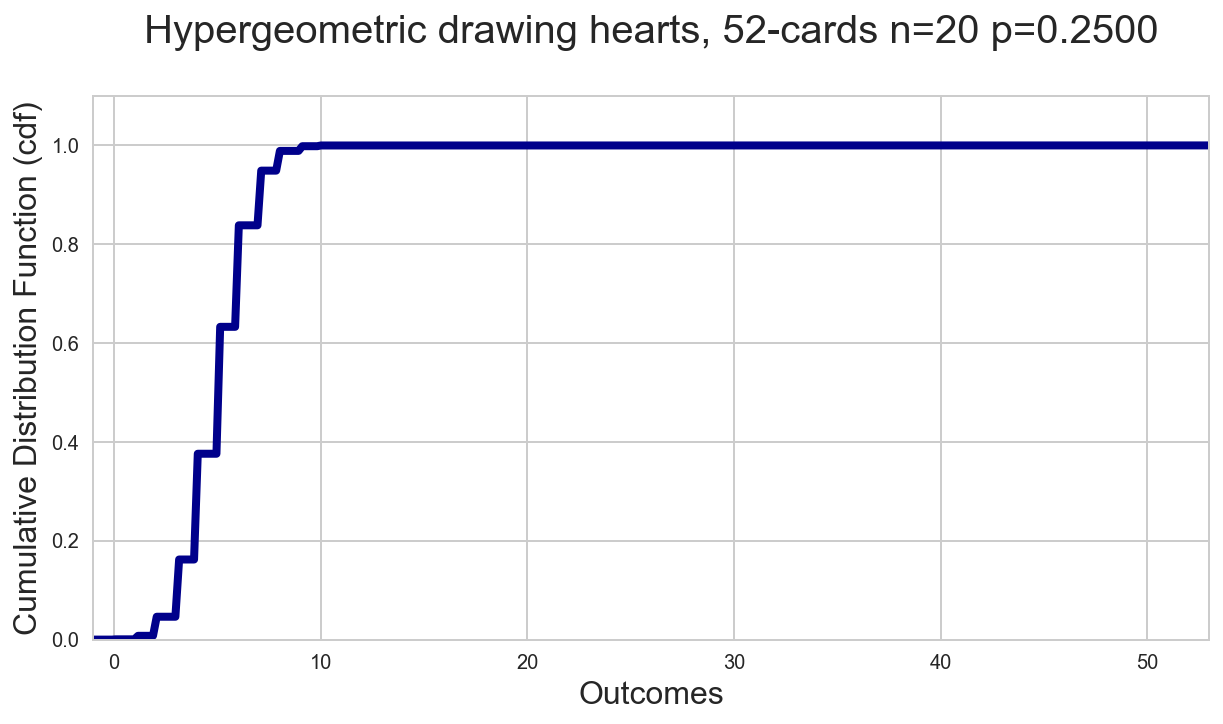

In [20]:
plot_discrete_cdf(0, 52, 0.25, 20, 'Hypergeometric drawing hearts, 52-cards', stats.hypergeom(52,13,20))

## The Poisson distribution

---

The Poisson distribution represents the counts of "positive" events, or successes, within a time span. It shares a relationship with Bernoulli random variables and the Binomial distribution. 

A Bernoulli random variable represents the probability that an event will occur during a "trial". Imagine we had a Bernoulli random variable that was the probability of a user visiting our site between 12pm and 1pm. If we change this to be between 12pm and 12:15pm, this remains a Bernoulli random variable but the probability has decreased. As the time frame shrinks, the probability shrinks as well.

The Poisson distribution represents infinitely many infinitely small probability trials. $n$ increases to infinity and $p$ shrinks towards zero such that $np$ remains the same. The Poisson distribution is the Binomial distribution taken to the limit.

When we use this:

- when the number of successes is is a non-negative integer,
- when events occur independently,
- when the rate at which events occur is constant,
- when two events cannot occur at exactly the same instant, and
- the probability of an event occurring in an interval is proportional to the length of the interval.

Parameters of the distribution:

- rate of event occurring $\lambda$

#### Poisson pmf

$$f(x|\lambda) = P(X=x) = \frac{\lambda^x e^{-\lambda}}{x!} $$

Where $x$ is the number of events that occur in an interval,

and $\lambda$ is the rate at which events occur.

Let's say, for example, we are measuring visitors to our website. What is the probability mass function of the Poisson distribution for visitor counts given we have an average rate of 25 visitors per hour?

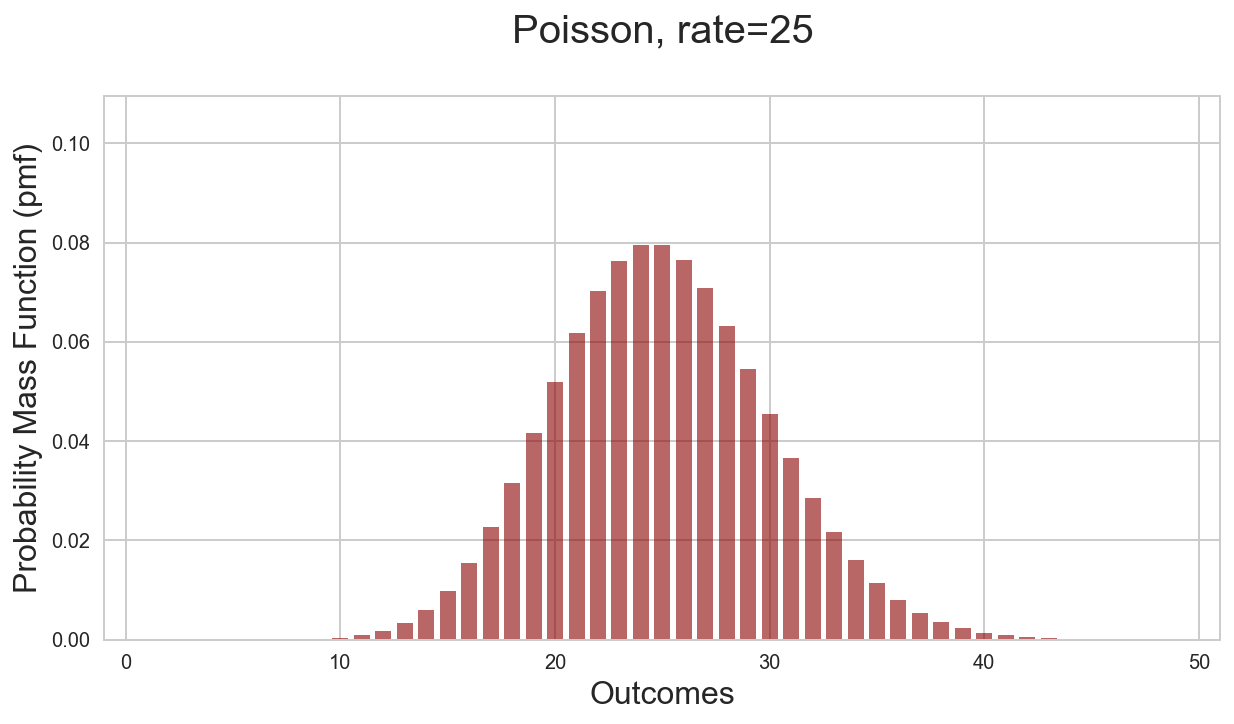

In [21]:
plot_discrete_pmf(0, 50, dist_name='Poisson, rate=25', stats_dist=stats.poisson(25), lw=8)

What if the rate was 5 instead?

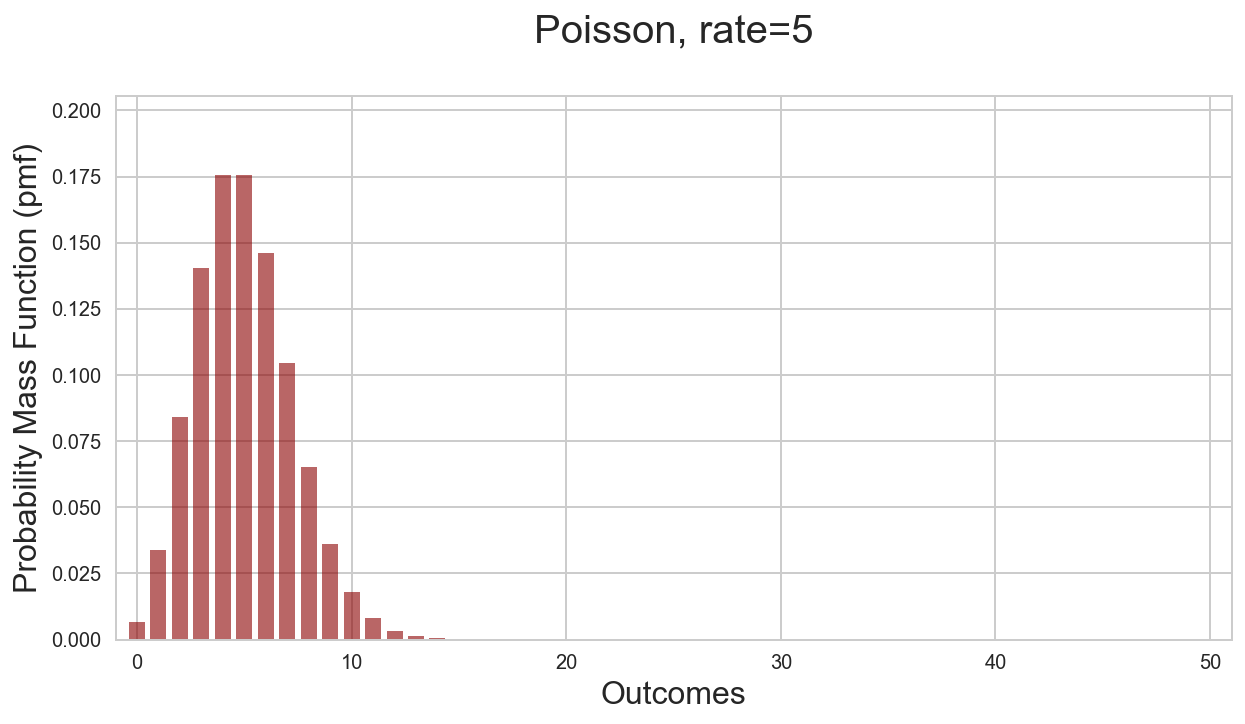

In [22]:
plot_discrete_pmf(0, 50, dist_name='Poisson, rate=5', stats_dist=stats.poisson(5), lw=8)

#### Poisson cdf

The cumulative distribution is given by the formula:

### $$ e^{-\lambda} \sum_{i=0}^{\lfloor x\rfloor} \frac{\lambda^i}{i!} $$

Where the $\lfloor x\rfloor$ represents the greatest integer less than or equal to $x$.

In [ ]:
plot_discrete_cdf(0, 50, dist_name='Poisson, rate=25', stats_dist=stats.poisson(25))

As we'll discuss later:

- The Poisson distribution, parameterized by $\lambda$, has a mean and variance of $\lambda$.
- Poisson regression is a variant of linear regression (which we'll discuss next week) that is specifically designed to predict non-negative integer outcomes.

# Continuous Distributions!

## The Exponential distribution

---

What if we were interested in how long until something happens, rather than how many events occur within a timeframe? **The Exponential Distribution models the amount of time until an event occurs.**

Recall that the Poisson distribution is the Binomial distribution taken to the limit where the event times are infinitesimally small ($p$ of an event goes to zero) but there are infinitely many events ($n$ goes to infinity). Likewise, the Exponential is the Geometric distribution taken to the same limits.

Where the Geometric distribution measures the **number of trials until a success**, the Exponential measures the **time until a success**.

This is the first instance of a continuous distribution, since time is a continuous measure.

Parameters of the distribution:

- $\lambda$, the rate of event occurrences.

#### Exponential pdf

The Exponential pdf is defined as:

$$ f(x|\lambda) = \lambda  e^{-\lambda x} $$

In this case, $x$ is the time elapsed.

Returning to the website example, we could ask: given a rate of 10 visitors per hour, how long from now will we expect the next visitor to arrive?

In [ ]:
def plot_continuous_pdf(low, high, dist_name='Continuous', xlabel='Time', stats_dist=None, lw=5):
        
    x = np.arange(low, high+1.)
    
    fig, ax = plt.subplots(1, 1, figsize=(10,5))
    
    ax.set_xlim(low-1, high+1)
    ax.set_xlabel(xlabel, fontsize=16)
    ax.set_ylabel('Probability Density Function (pdf)', fontsize=16)
    ax.plot(x, stats_dist.pdf(x), color='darkred', lw=lw)
    ax.set_ylim(0, np.max(stats_dist.pdf(x))+0.03)
    
    title = dist_name+'\n'
    plt.title(title, fontsize=20)

    plt.show()

In [ ]:
plot_continuous_pdf(0, 60, dist_name='Prob minutes to next visitor (10/hr)', 
                    stats_dist=stats.expon(scale=1./(1./6.)), xlabel='Minutes')

#### Exponential cdf

The cumulative distribution function is:

$$ F(x|\lambda) = 1 -  e^{-\lambda x} $$

With the same example, our cumulative distribution function looks like:

In [ ]:
def plot_continuous_cdf(low, high, dist_name='Continuous', xlabel='Time', stats_dist=None):
        
    x = np.linspace(low, high+1, 300)
    
    fig, ax = plt.subplots(1, 1, figsize=(10,5))

    ax.set_ylim(0, 1.1)
    ax.set_xlim(low-1, high+1)
    ax.set_xlabel(xlabel, fontsize=16)
    ax.set_ylabel('Cumulative Distribution Function (cdf)', fontsize=16)
    
    ax.plot(x, stats_dist.cdf(x), lw=4, color='darkblue')

    title = dist_name+'\n'
    plt.title(title, fontsize=20)

    plt.show()

In [ ]:
plot_continuous_cdf(0, 60, dist_name='Prob minutes to next visitor (10/hr)', 
                    stats_dist=stats.expon(scale=1./(1./6.)), xlabel='Minutes')

<a id='normal'></a>

## The Normal distribution

---

The Normal distribution is the most well known, and most important distribution. The Normal distribution models the sum of random variables from _any_ distribution. (Since the mean of random variables is just the sum of random variables divided by some constant, the Normal distribution also models the mean of random variables from _any_ distribution.)

This is the Central Limit Theorem, which is far more general than we discussed yesterday!

For example, the sum of a series of Bernoulli trials will be Normally distributed the more trials are summed. If this is confusing, it is important to remember that the Normal distribution is a random variable _representing the probabilities of outcomes from summing the Bernoulli trials._ It is modelling the possible sums.

There are some caveats to the idea that the sum of random variables will be normally distributed, but it holds true in most cases. Because of the Central Limit Theorem, the normal distribution appears all over the place.

Parameters of the distribution:

- $\mu$ is the mean.
- $\sigma$ is the standard deviation of the distribution.

#### Normal pdf

The probability density function of the Normal distribution is given by

### $$ f(x \; | \; \mu, \sigma) = \frac{1}{\sqrt{2\sigma^2\pi} } \; e^{ -\frac{(x-\mu)^2}{2\sigma^2} } $$

Thus a Normal distribution is parameterized by its mean and variance.

Let's return to a Poisson variable example. Say we are measuring the number of users that come to our site. The rate of visitors to our site is 25 per hour. We measure the number of visitors that come to our site on 500 different hours:

In [ ]:
visitors = stats.poisson(25).rvs(500)

In [ ]:
sns.distplot(visitors, bins=30, kde=False)

If we plot the visitor count histogram for the 500 different hour measurements, we can see that it is normally distributed.

In [ ]:
plot_continuous_pdf(10, 45, dist_name='Expected number of visitors to site in hour', 
                    stats_dist=stats.norm(np.mean(visitors), np.std(visitors)), xlabel='Visitors')

#### Normal cdf

[The Normal cumulative distribution function has to be approximated.](https://en.wikipedia.org/wiki/Normal_distribution#Definition) See the wikipedia page for the details on how it is calculated. 

We can plot it here, however, using the scipy module.

In [ ]:
plot_continuous_cdf(10, 45, dist_name='Expected number of visitors to site in hour', 
                    stats_dist=stats.norm(np.mean(visitors), np.std(visitors)), xlabel='Visitors')